#  Predicting Heart Disease based on Cleveland's Dataset

## 1. Introduction

Heart disease is a broad term that encompasses medical conditions that primarily affect coronary arteries, heart rhythm and the health of the heart; some of which are inherited. It is the leading cause of death in the United States, accounting for roughly 1 in every 4 deaths and is notoriously hard to diagnose due to the requirement of several variables needing to simultaneously point towards the same conclusion. Some of the primary factors required in a diagnosis including age, resting (normal) blood pressure, serum cholesterol (level of cholesterol in blood), fasting blood pressure and the maximum heart rate. 

 

The Cleveland Heart Disease Dataset found on the UCI Machine Learning Repository comprises of information on 303 individuals (206 men and 97 women), with an age range of 29 to 77 and 14 variables. Our research question is to assess whether we can create a model that produces the most accurate prediction of the diagnosis of patients using the most relevant variables. The main aim is to have a model that is as accurate as possible given the heavy implications of a misdiagnosis.  

## 2. Preliminary exploratory data analysis:

In [7]:
# Loading the libraries.
library(tidyverse)
library(tidymodels)
library(dplyr)
library(readr)
library(cowplot)
library(recipes)
library(RColorBrewer)

In [34]:
#Loading data into R, selecting interested columns and previewing first 6 rows.
heart <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                  col_names = c("age", "sex", "chestpaintype", "restbps", 
                                "cholesterolserum", "fastingbs", "restecg",
                                "maxheartrate", "exerciseangina", "oldpeak",
                                "slope", "nmajorvessels", "thalassemia", 
                                "diagnosis"))                               %>%
         mutate(diagnosis = as_factor(diagnosis))                           %>%
         select(age, sex, oldpeak, nmajorvessels, 
                fastingbs, maxheartrate, diagnosis)
head(heart)

#Looking at how many missing values are in each variable:
colSums(is.na(heart))

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chestpaintype = col_double(),
  restbps = col_double(),
  cholesterolserum = col_double(),
  fastingbs = col_double(),
  restecg = col_double(),
  maxheartrate = col_double(),
  exerciseangina = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  nmajorvessels = col_character(),
  thalassemia = col_character(),
  diagnosis = col_double()
)



age,sex,oldpeak,nmajorvessels,fastingbs,maxheartrate,diagnosis
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,1,2.3,0.0,1,150,0
67,1,1.5,3.0,0,108,2
67,1,2.6,2.0,0,129,1
37,1,3.5,0.0,0,187,0
41,0,1.4,0.0,0,172,0
56,1,0.8,0.0,0,178,0


age           sex       oldpeak nmajorvessels     fastingbs 
            0             0             0             0             0 
 maxheartrate     diagnosis 
            0             0

In [36]:
#A closer look shows that nmajorvessels has 4 NA values that should be filtered.
heart$nmajorvessels
heart_filtered <- heart %>%
filter(nmajorvessels != "?")

head(heart_filtered)

[1] "0.0" "3.0" "2.0" "0.0" "0.0" "0.0" "2.0" "0.0" "1.0" "0.0" "0.0" "0.0"
 [13] "1.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "2.0"
 [25] "2.0" "0.0" "0.0" "0.0" "0.0" "0.0" "2.0" "2.0" "0.0" "0.0" "0.0" "0.0"
 [37] "0.0" "1.0" "1.0" "0.0" "3.0" "0.0" "2.0" "0.0" "0.0" "1.0" "0.0" "0.0"
 [49] "1.0" "0.0" "1.0" "0.0" "1.0" "0.0" "1.0" "1.0" "1.0" "0.0" "1.0" "1.0"
 [61] "0.0" "0.0" "3.0" "0.0" "1.0" "2.0" "0.0" "0.0" "0.0" "0.0" "0.0" "2.0"
 [73] "2.0" "2.0" "1.0" "0.0" "1.0" "1.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0"
 [85] "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "3.0" "3.0" "0.0" "0.0" "1.0"
 [97] "1.0" "2.0" "1.0" "0.0" "0.0" "0.0" "1.0" "1.0" "3.0" "0.0" "1.0" "1.0"
[109] "1.0" "0.0" "0.0" "1.0" "0.0" "0.0" "1.0" "0.0" "0.0" "0.0" "3.0" "1.0"
[121] "2.0" "3.0" "0.0" "0.0" "1.0" "0.0" "2.0" "1.0" "0.0" "0.0" "0.0" "1.0"
[133] "0.0" "0.0" "0.0" "0.0" "0.0" "1.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0"
[145] "0.0" "0.0" "3.0" "0.0" "0.0" "1.0" "0.0" "0.0" "0.0" "1.0" "1.0" "3.0"
[157] "0.0" "2.0" "2.0" "1.0" "0.0" "3.0" "0.0" "0.0" "2.0" "0.0" "?"   "1.0"
[169] "0.0" "0.0" "1.0" "0.0" "0.0" "0.0" "2.0" "1.0" "3.0" "1.0" "1.0" "3.0"
[181] "0.0" "2.0" "2.0" "0.0" "0.0" "2.0" "0.0" "3.0" "1.0" "3.0" "0.0" "3.0"
[193] "?"   "3.0" "0.0" "2.0" "1.0" "0.0" "0.0" "0.0" "0.0" "0.0" "1.0" "0.0"
[205] "0.0" "3.0" "2.0" "0.0" "0.0" "0.0" "0.0" "0.0" "0.0" "2.0" "1.0" "0.0"
[217] "0.0" "0.0" "2.0" "0.0" "0.0" "0.0" "0.0" "2.0" "2.0" "0.0" "0.0" "1.0"
[229] "1.0" "1.0" "0.0" "0.0" "3.0" "1.0" "1.0" "2.0" "0.0" "0.0" "0.0" "0.0"
[241] "0.0" "0.0" "0.0" "2.0" "0.0" "0.0" "1.0" "1.0" "2.0" "0.0" "0.0" "1.0"
[253] "1.0" "0.0" "0.0" "0.0" "2.0" "0.0" "0.0" "0.0" "1.0" "2.0" "0.0" "0.0"
[265] "1.0" "0.0" "0.0" "1.0" "0.0" "0.0" "1.0" "0.0" "2.0" "0.0" "2.0" "0.0"
[277] "1.0" "0.0" "1.0" "0.0" "1.0" "0.0" "1.0" "0.0" "1.0" "3.0" "2.0" "?"  
[289] "0.0" "0.0" "0.0" "0.0" "0.0" "2.0" "0.0" "0.0" "2.0" "0.0" "0.0" "2.0"
[301] "1.0" "1.0" "?"

age,sex,oldpeak,nmajorvessels,fastingbs,maxheartrate,diagnosis
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,1,2.3,0.0,1,150,0
67,1,1.5,3.0,0,108,2
67,1,2.6,2.0,0,129,1
37,1,3.5,0.0,0,187,0
41,0,1.4,0.0,0,172,0
56,1,0.8,0.0,0,178,0


In [44]:
# Since values other than 0 for diagnosis means presence of heart disease, 1-4
# values are lumped into 1. Sex and diagnosis are also recoded to ease
# understanding of their values and converted into factors for graphing.
# Number of major vessels is converted into numeric.
heart_disease <- heart_filtered %>%
                 mutate(diagnosis = fct_lump(diagnosis, other_level = "1")) %>%
                 mutate(sex = recode_factor(sex, `1` = "Male", 
                                                 `0` = "Female" ),
                        diagnosis = recode_factor(diagnosis, `1` = "Yes",
                                                             `0` = "No"),
                        fastingbs = recode_factor(fastingbs, `1` = "Over 120", 
                                                             `0` = "Under 120")) %>%
                 mutate(nmajorvessels = as.numeric(nmajorvessels))

#Splitting the data.
set.seed(11)
heart_split <- initial_split(heart_disease, prop = 0.70, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
nrow(heart_train)
nrow(heart_test)

[1] 210

[1] 89

In [48]:
#Looking at the means/ratio of each predictor for each type of diagnosis.
group_summary <- heart_train %>% 
  group_by(diagnosis) %>% 
  summarize(size = n(),
            age_mean = mean(age),
            maxheartrate_mean = mean(maxheartrate),
            oldpeak_mean = mean(oldpeak),
            nmajorvessels_mean = mean(nmajorvessels),
            sex_fraction_female = sum(sex == "Female")/n(),
            sex_fraction_male = sum(sex == "Male")/n(),
fastingbs_fraction_over_120 = sum(fastingbs == "Over 120")/n(),
fastingbs_fraction_under_120 = sum(fastingbs == "Under 120")/n())
group_summary

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,size,age_mean,maxheartrate_mean,oldpeak_mean,nmajorvessels_mean,sex_fraction_female,sex_fraction_male,fastingbs_fraction_over_120,fastingbs_fraction_under_120
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Yes,97,57.14433,138.3402,1.535052,1.1855670,0.1134021,0.8865979,0.1340206,0.8659794
No,113,52.23009,159.6726,0.600000,0.2920354,0.4247788,0.5752212,0.1592920,0.8407080


In [46]:
#Looking at overall means for numeric predictors.
heart_means <- heart_train                                               %>%
               select(age, maxheartrate, oldpeak, nmajorvessels)         %>%
               map_df(mean)
heart_means

age,maxheartrate,oldpeak,nmajorvessels
<dbl>,<dbl>,<dbl>,<dbl>
54.5,149.819,1.031905,0.7047619


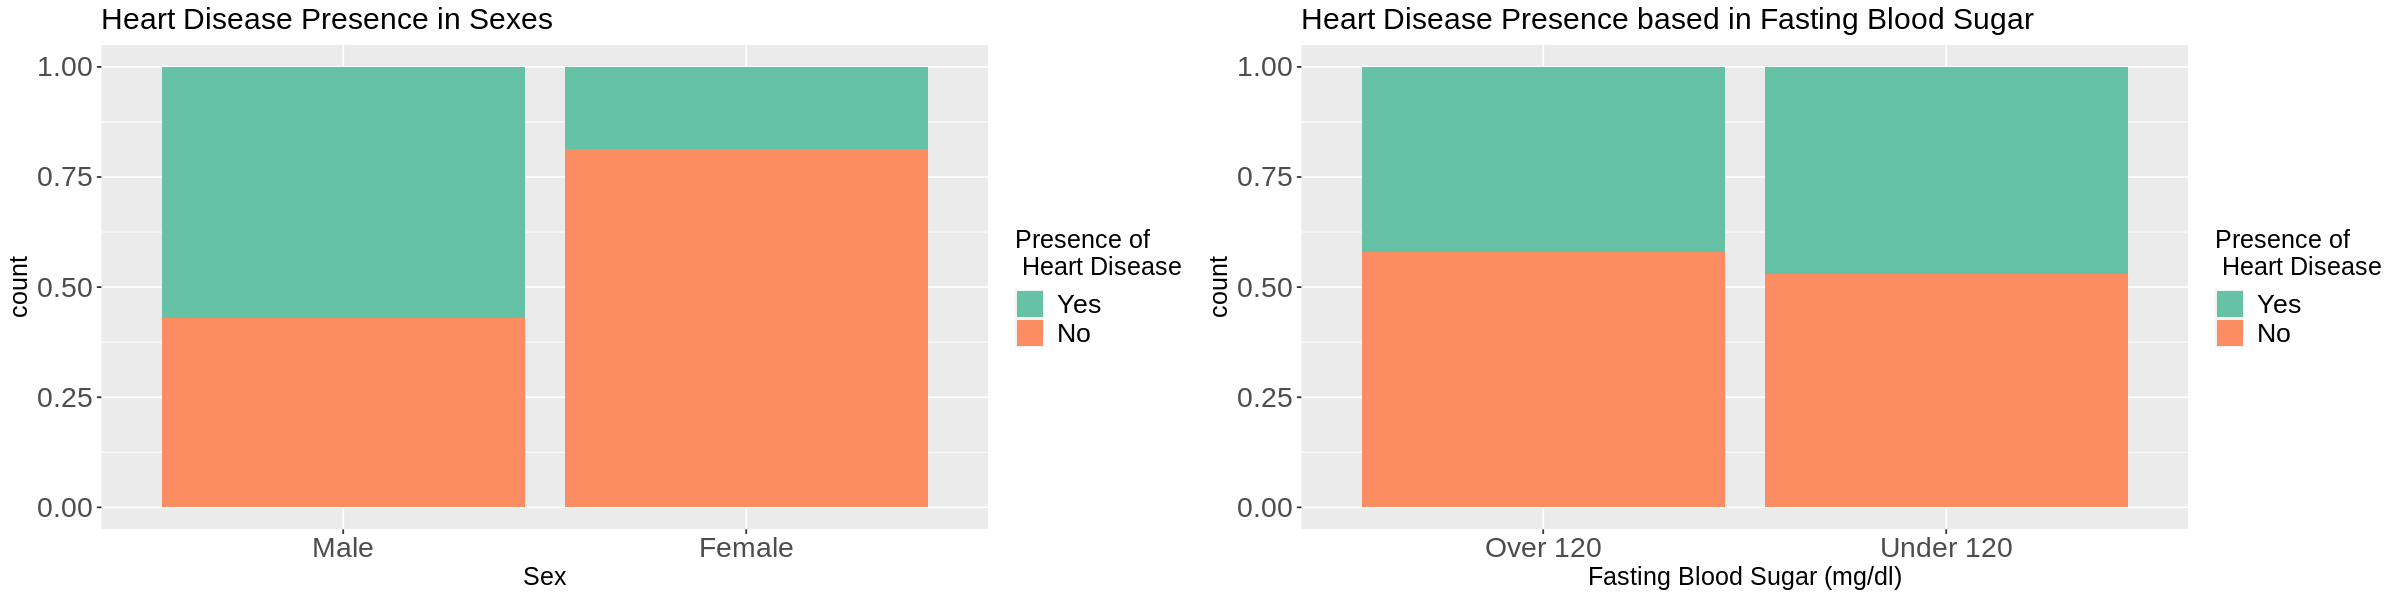

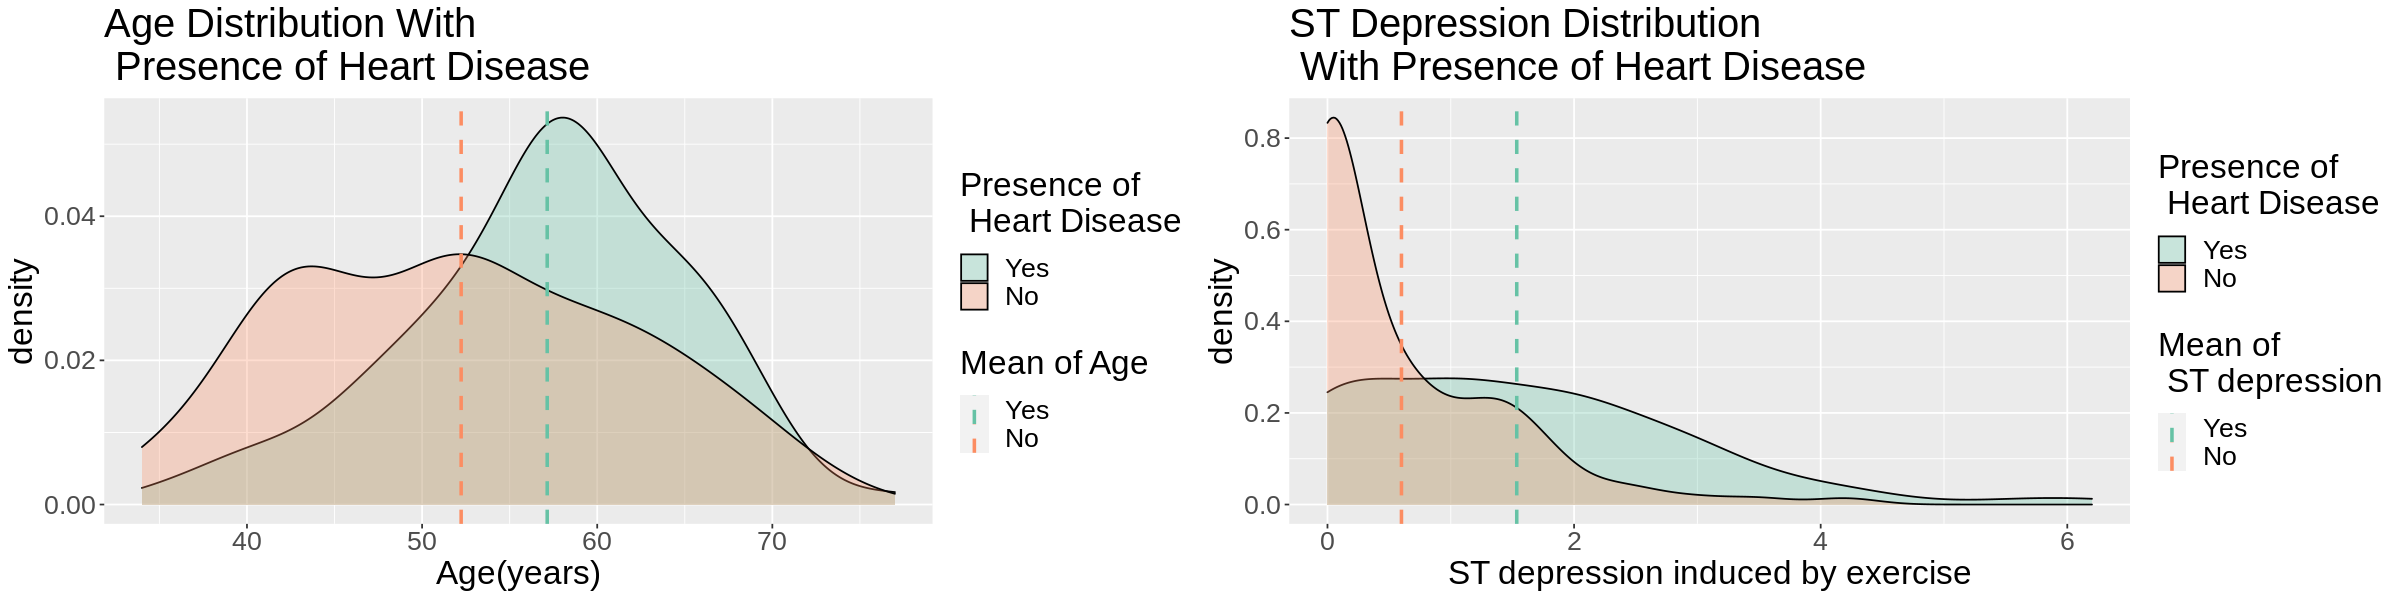

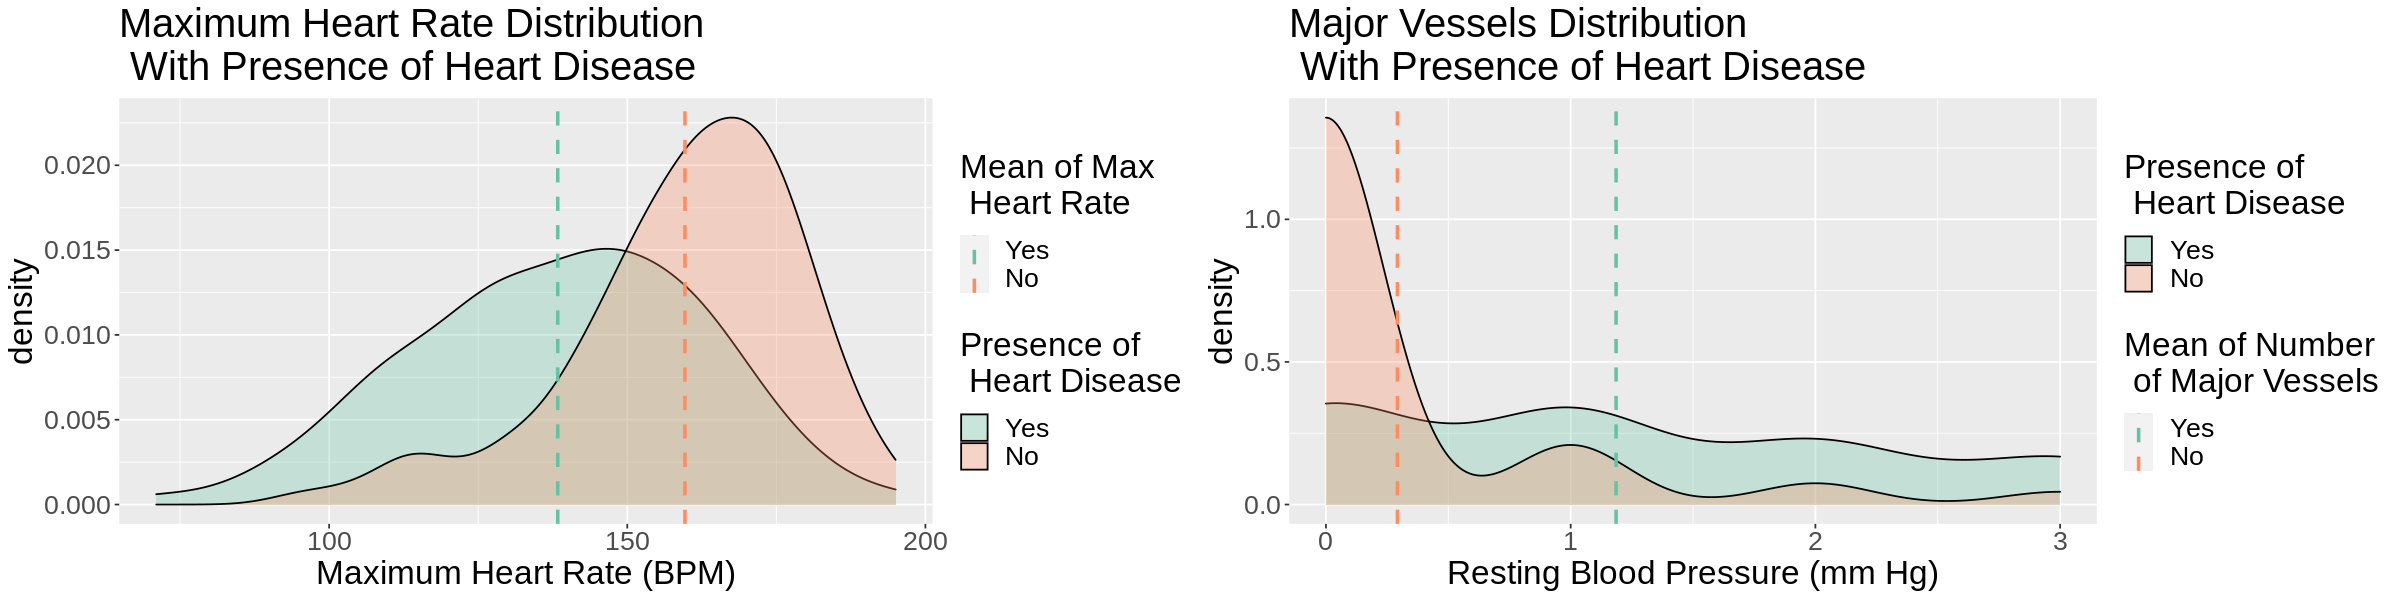

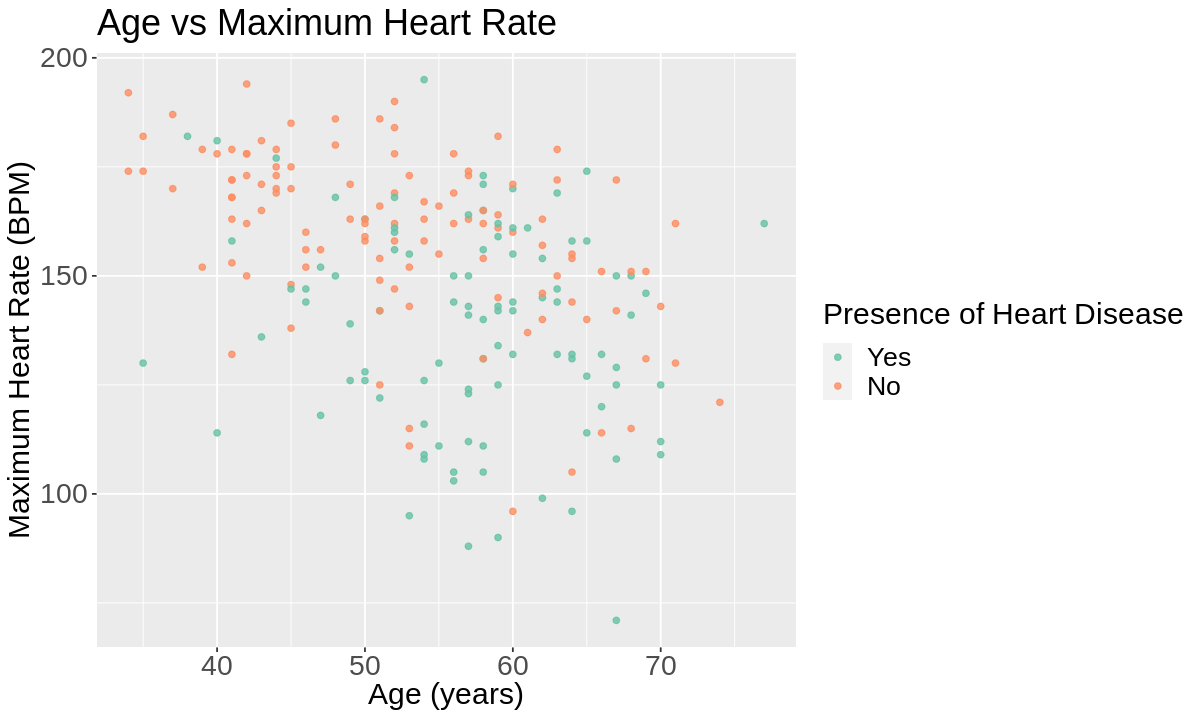

In [54]:
#Visualizing different relevant plots with training data.
options(repr.plot.width = 20, repr.plot.height = 5) 

#Plotting a bar graph looking at presence of heart disease based in the sex.
sex_plot <- ggplot(heart_train, aes(x = sex, fill = diagnosis))             +
             geom_bar(position = "fill")                                   +
             labs(x = "Sex", fill = "Presence of \n Heart Disease")            +
             ggtitle("Heart Disease Presence in Sexes")                     +
             theme(text = element_text(size = 20),
                   axis.text.x = element_text(size = 17),
                   axis.text.y = element_text(size = 17),
                   title       = element_text(size = 15))                   +
             scale_fill_brewer(palette = "Set2")

#Plotting a bar graph looking at presence of heart disease based on fasting blood sugar level.
bs_plot  <- ggplot(heart_train, aes(x = fastingbs, fill = diagnosis))       +
             geom_bar(position = "fill")                                   +
             labs(x = "Fasting Blood Sugar (mg/dl)", 
                  fill = "Presence of \n Heart Disease")                       +
             ggtitle("Heart Disease Presence based in Fasting Blood Sugar") +
             theme(text = element_text(size = 20),
                   axis.text.x = element_text(size = 17),
                   axis.text.y = element_text(size = 17),
                   title       = element_text(size = 15))                   +
             scale_fill_brewer(palette = "Set2")

#Looking at age distribution
age_plot <- ggplot(heart_train, aes(x = age, fill = diagnosis)) +
geom_density(alpha = 0.3) +
geom_vline(data = group_summary, aes(xintercept = age_mean, color = diagnosis),
           linetype = "dashed", size = 1) +
labs(x = "Age(years)", fill = "Presence of \n Heart Disease", color = "Mean of Age") +
ggtitle("Age Distribution With \n Presence of Heart Disease") +
theme(text = element_text(size = 20)) +
scale_fill_brewer(palette = "Set2") +
scale_color_brewer(palette = "Set2")

#Looking at ST depression induced by exercise distribution
peak_plot <- ggplot(heart_train, aes(x = oldpeak, fill = diagnosis)) +
geom_density(alpha = 0.3) +
geom_vline(data = group_summary, aes(xintercept = oldpeak_mean, color = diagnosis),
 linetype="dashed", size=1) +
labs(x = "ST depression induced by exercise", fill = "Presence of \n Heart Disease", color = "Mean of \n ST depression") +
ggtitle("ST Depression Distribution \n With Presence of Heart Disease") +
theme(text = element_text(size = 20)) +
 scale_fill_brewer(palette = "Set2") +
scale_color_brewer(palette = "Set2")

#Looking at maximum heart rate distribution
heartrate_plot <- ggplot(heart_train, aes(x = maxheartrate, fill = diagnosis)) +
geom_density(alpha = 0.3)+
geom_vline(data = group_summary, aes(xintercept = maxheartrate_mean, color = diagnosis),
             linetype="dashed", size=1) +
labs(x = "Maximum Heart Rate (BPM)", fill = "Presence of \n Heart Disease", color = "Mean of Max \n Heart Rate") +
ggtitle("Maximum Heart Rate Distribution \n With Presence of Heart Disease") +
theme(text = element_text(size = 20)) +
 scale_fill_brewer(palette = "Set2") +
scale_color_brewer(palette = "Set2")
      
#Looking at resting blood pressure distribution
vessel_plot<- ggplot(heart_train, aes(x = nmajorvessels, fill = diagnosis)) +
geom_density(alpha = 0.3) +
geom_vline(data = group_summary, aes(xintercept = nmajorvessels_mean, color = diagnosis),
linetype="dashed", size=1) +
labs(x = "Resting Blood Pressure (mm Hg)", fill = "Presence of \n Heart Disease", color = "Mean of Number \n of Major Vessels") +
ggtitle("Major Vessels Distribution \n With Presence of Heart Disease") +
theme(text = element_text(size = 20)) +
scale_fill_brewer(palette = "Set2") +
scale_color_brewer(palette = "Set2")
      
plot_grid(sex_plot, bs_plot, ncol = 2)
plot_grid(age_plot, peak_plot, ncol = 2)
plot_grid(heartrate_plot, vessel_plot, ncol = 2)

#Plotting a scatter plot with Age vs Maximum Heart Rate
age_heart <- ggplot(heart_train, aes(x = age, y = maxheartrate, 
                                       color = diagnosis))                  +
              geom_point(alpha = 0.8)                                       +
              labs(x = "Age (years)", y = "Maximum Heart Rate (BPM)", 
                   color = "Presence of Heart Disease")                     +
              ggtitle("Age vs Maximum Heart Rate")                          +
              theme(text = element_text(size = 20),
                    axis.text.x = element_text(size = 17),
                    axis.text.y = element_text(size = 17),
                    title       = element_text(size = 18))                  +
              scale_color_brewer(palette = "Set2")

options(repr.plot.width = 10, repr.plot.height = 6)
age_heart

## Expected Outcomes & Their Significance

We would like to derive from this data is what factors have the heaviest say in determining the diagnosis of heart disease. As current research shows, men are more prone to being diagnosed with a heart disease, we would also like to assess whether this hypothesis proves true in our data. Going a step further, it will be important to know why men are more susceptible to the leading factors that end in heart in disease to see what could be done about it. This depends however on whether it is genetic, and thus not much can be done about it, or whether is cultural, such as higher mean alcohol and drug consumption. 